# Applying the MONETIO module for HYSPLIT Ash Dispersal Modeling of Okmok CFE II in 43 B.C.E.

<img src="okmok.jpg">

For this project, I apply the MONETIO xarray module to NOAA HYSPLIT modeling data in the hope that I will be able to easily recreate plots with higher quality parameter inputs from the Okmok II eruption that occurred 2050 +- 50 yrs BP. 

This Aleutian Arc eruption may have had significant climate impacts in the Northern Hemisphere, as explained in McConnell, et al. 2020. Ash dispersal modeling is necessary to corroborate the hypothesis that the tephra found in Greenland ice cores could have been from  Okmok CFE II.

sources: 

https://www.ready.noaa.gov/HYSPLIT_ash.php

https://github.com/noaa-oar-arl/monetio

https://github.com/BritishGeologicalSurvey/ash-model-plotting

## Running Test Script

The ash-model-plotting repository includes a test script with pre-assigned class variables from an Icelandic eruption:

<img src="Air_Concentration_01000_20200331000000.png">

When run, the output is .png file plot of modeled air concentration, total column mass, and total deposition, in the directory of your choice. This was useful, but I wanted to make nicer plots with cartopy and xarray for later application to my project.

## Optimizing for Cartopy, Xarray, and Matplotlib Integration

I wanted to make sure it was possible to integrate a netCDF of modeled data for use in a Jupyter notebook using the method we learned in RCES. I extracted the HYSPLIT data file from the ash-model-plotting module and plotted it using cartopy and xarray.

In [43]:
#imports
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
import cartopy.crs as ccrs
import cartopy

#formatting
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = (16,8)
from IPython import display
display.set_matplotlib_formats('retina')

In [44]:
#open .nc HYSPLIT data file
ds = xr.open_dataset('hysplit_operational.nc', drop_variables=['time_bnds'])
ds

<xarray.Dataset>
Dimensions:    (latitude: 601, levels: 3, longitude: 801, origins: 2, time: 2)
Coordinates:
  * time       (time) datetime64[ns] 2020-03-31 2020-03-31T06:00:00
  * longitude  (longitude) float32 -30.0 -29.95 -29.9 ... 9.900002 9.950001 10.0
  * latitude   (latitude) float32 40.0 40.05 40.1 40.15 ... 69.9 69.95 70.0
  * levels     (levels) float64 0.0 1e+03 2e+03
Dimensions without coordinates: origins
Data variables:
    olat       (origins) float32 ...
    olon       (origins) float32 ...
    olvl       (origins) float32 ...
    otim       (origins) int32 ...
    AS01       (time, levels, latitude, longitude) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.6 (http://mpimet.mpg.de/...
    history:      Mon Mar 30 16:08:44 2020: cdo -sellevel,0,1000,2000 -seldat...
    Conventions:  CF-1.5
    title:        HYSPLIT Model Concentration Output
    CDO:          Climate Data Operators version 1.9.6 (http://mpimet.mpg.de/...

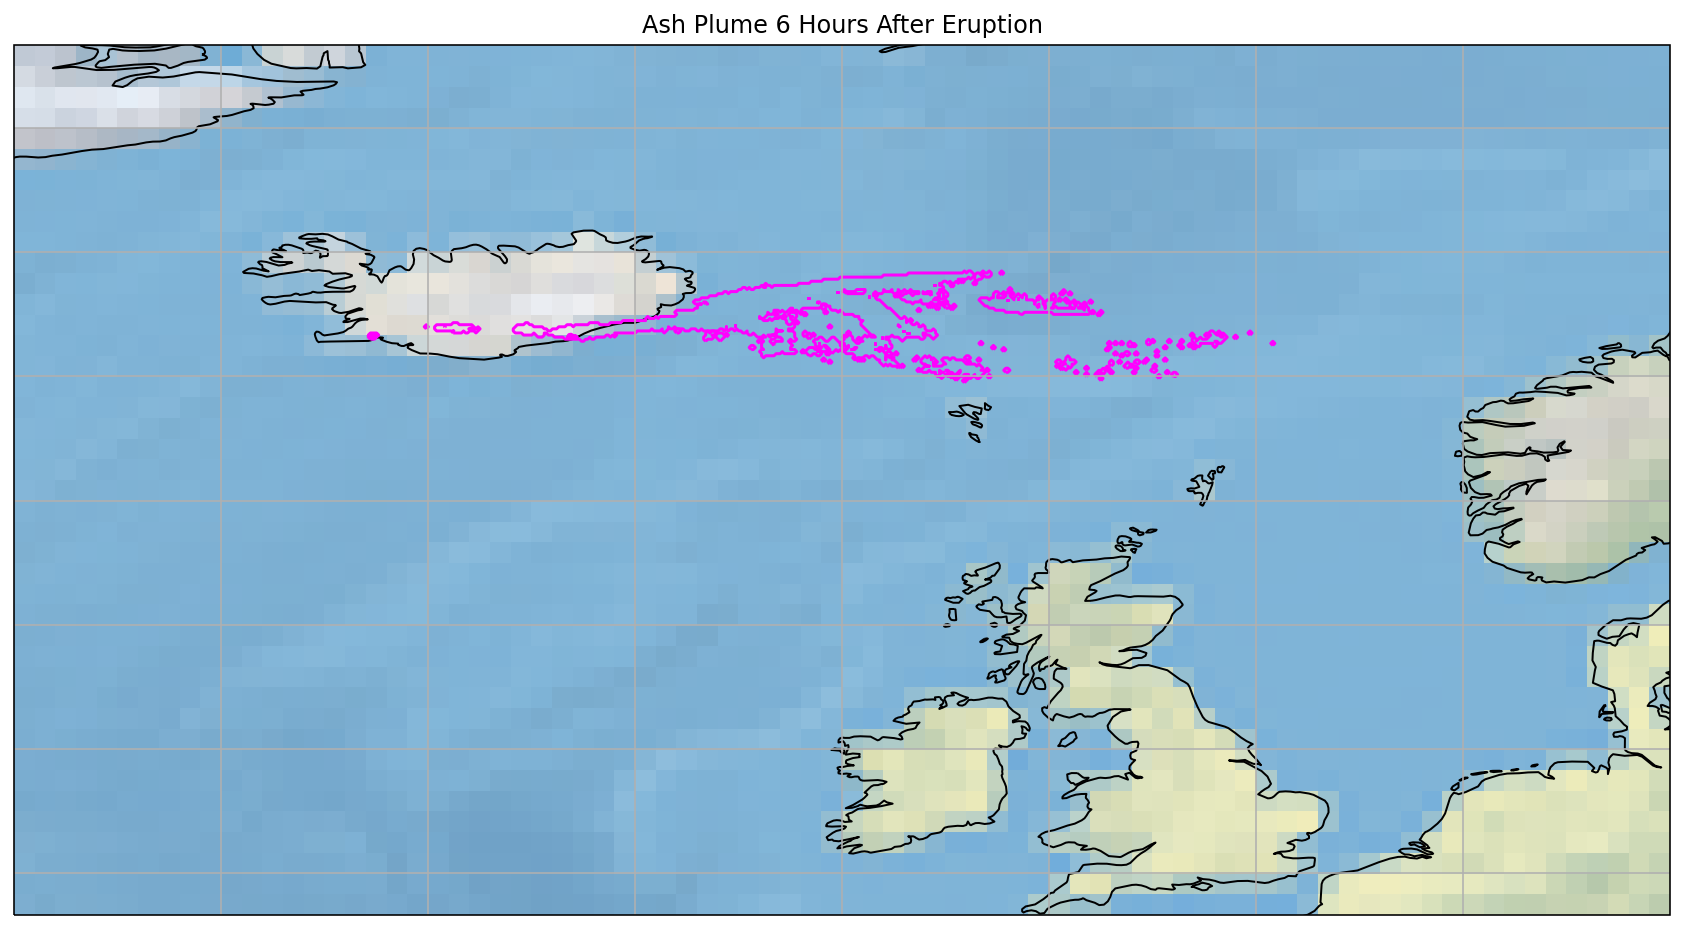

In [45]:
#Select concentration data, level, and time
con = ds.AS01.sel(time = '2020-03-31T06:00:00.000000000', levels = 0.)

#plot formatting
extent = [-30, 10, 50, 70]
fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
ax.stock_img()
ax.set_extent(extent)
con.plot.contour(ax=ax, transform = ccrs.PlateCarree(), cmap = 'magenta')
ax.set_title('Ash Plume 6 Hours After Eruption');

## Application to Hypothetical Okmok Eruption

I used the HYSPLIT model from NOAA's Air Resources Library to model a hypothetical Okmok eruption with theorized parameters from Okmok CFE II, 2050 yrs BP. For this, I needed to use the MONETIO module from Github to extract the concentration data from the binary concentration output file and transform it into an xarray. 

In [2]:
#Run script needed to unpack binary concentration file
%run monetio/monetio/models/hysplit.py

In [3]:
#imports
import sys
import datetime
import pandas as pd
import xarray as xr
import numpy as np
from numpy import fromfile, arange
from matplotlib import pyplot as plt
import cartopy.crs as ccrs
import cartopy

#formatting
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = (16,8)
from IPython import display
display.set_matplotlib_formats('retina')

#binary concentration file from HYSPLIT
f = 'cdump_48991.bin'

In [4]:
#open dataset with xarray
ds = open_dataset(f, drange= None, verbose = False)
#add all species of particulate matter
dsadd = add_species(ds, species = None)
#calculate total massloading
massload = hysp_massload(dsadd, threshold=0, mult=1e10)

sample time 2020-12-09 05:00:00  to  2020-12-09 06:00:00
sample time 2020-12-09 11:00:00  to  2020-12-09 12:00:00
sample time 2020-12-09 17:00:00  to  2020-12-09 18:00:00
sample time 2020-12-09 23:00:00  to  2020-12-10 00:00:00
sample time 2020-12-10 05:00:00  to  2020-12-10 06:00:00
sample time 2020-12-10 11:00:00  to  2020-12-10 12:00:00
sample time 2020-12-10 17:00:00  to  2020-12-10 18:00:00
sample time 2020-12-10 23:00:00  to  2020-12-11 00:00:00
False None None
KEYS dict_keys(['Starting Locations', 'Source Date', 'Meteorological Model ID', 'Number Start Locations', 'Number of Levels', 'Level top heights (m)', 'Number of Species', 'Sampling Time', 'sample time hours', 'Species ID', 'Concentration Grid'])


## Final Figures

Figure descriptions are as follows:

Fig. 1: Shows the ash dispersal extent 18 hours after the modeled eruption using a contour representing measureable concentrations at 10,668 ft.

Fig. 2: Similar to Fig. 1, but at 6,096 ft. It seems that the extent is greater at higher altitudes, suggesting a column height of this magnitude leads to significant dispersal in the upper atmosphere.

Fig. 3: Shows the ash dispersal extent 36 hours after the modeled eruption at 16,674 ft. The NGRIP ice core in central Greenland is labeled, and it seems ash dispersal at this height is widespread across high latitudes in the Northern Hemisphere just 36 hours after the eruption.

Fig. 4: Another plot of ash dispersal at 16,674 ft., 36 hours following eruption. This plot shows relative concentration using the plasma colormap.

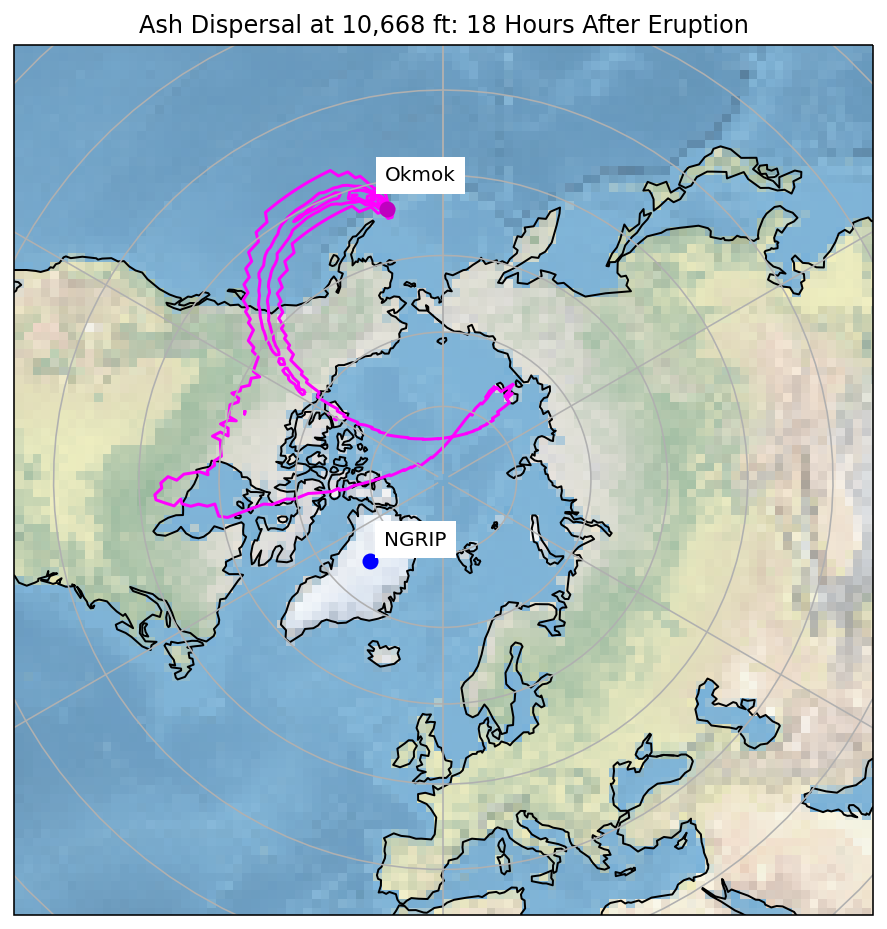

In [5]:
#select time and height of dispersal 18 hours, 10668 ft
con = dsadd.sel(time ='2020-12-09T23:00:00.000000000', z = 10668)

#plotting parameters
extent = [-180, 180, 35, 90]
fig = plt.figure()
ax = plt.axes(projection=ccrs.NorthPolarStereo())

ax.coastlines()
ax.stock_img()
ax.gridlines()
ax.set_extent(extent, ccrs.PlateCarree())
con.plot.contour(ax=ax, transform = ccrs.RotatedPole(pole_longitude=168.0, 
                                                     pole_latitude=84.0, 
                                                     central_rotated_longitude=-146), 
                 cmap = 'magenta')
ax.set_title('Ash Dispersal Extent at 10,668 ft: 18 Hours After Eruption')
ax.plot(-168.1750, 53.4681, 'mo', markersize=7, transform=ccrs.Geodetic())
ax.plot(-42.32, 75.1, 'bo', markersize=7, transform=ccrs.Geodetic())
ax.text(-42, 78, 'NGRIP', transform=ccrs.Geodetic(), backgroundcolor = 'white')
ax.text(-169, 50, 'Okmok', transform=ccrs.Geodetic(), backgroundcolor = 'white');

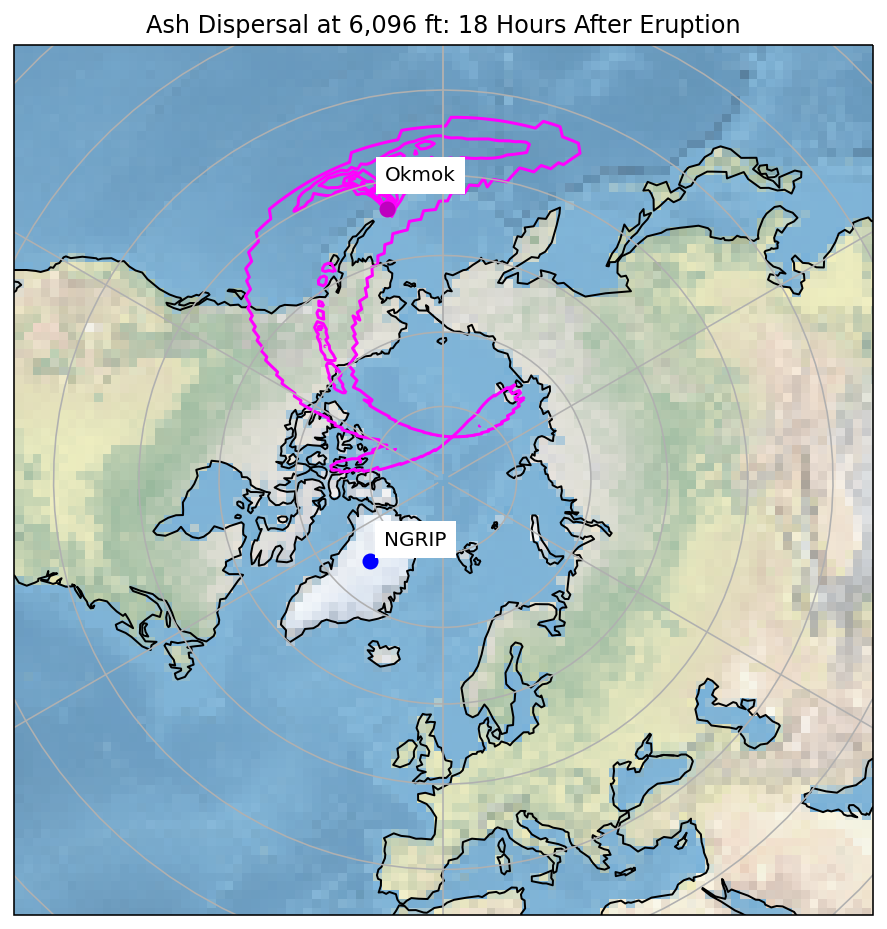

In [6]:
#18 hrs, 6096 ft
con = dsadd.sel(time ='2020-12-09T23:00:00.000000000', z = 6096)
extent = [-180, 180, 35, 90]
fig = plt.figure()
ax = plt.axes(projection=ccrs.NorthPolarStereo())

ax.coastlines()
ax.stock_img()
ax.gridlines()
ax.set_extent(extent, ccrs.PlateCarree())
con.plot.contour(ax=ax, transform = ccrs.RotatedPole(pole_longitude=168.0, 
                                                     pole_latitude=84.0, 
                                                     central_rotated_longitude=-146), 
                 cmap = 'magenta')
ax.set_title('Ash Dispersal Extent at 6,096 ft: 18 Hours After Eruption')
ax.plot(-168.1750, 53.4681, 'mo', markersize=7, transform=ccrs.Geodetic())
ax.plot(-42.32, 75.1, 'bo', markersize=7, transform=ccrs.Geodetic())
ax.text(-42, 78, 'NGRIP', transform=ccrs.Geodetic(), backgroundcolor = 'white')
ax.text(-169, 50, 'Okmok', transform=ccrs.Geodetic(), backgroundcolor = 'white');

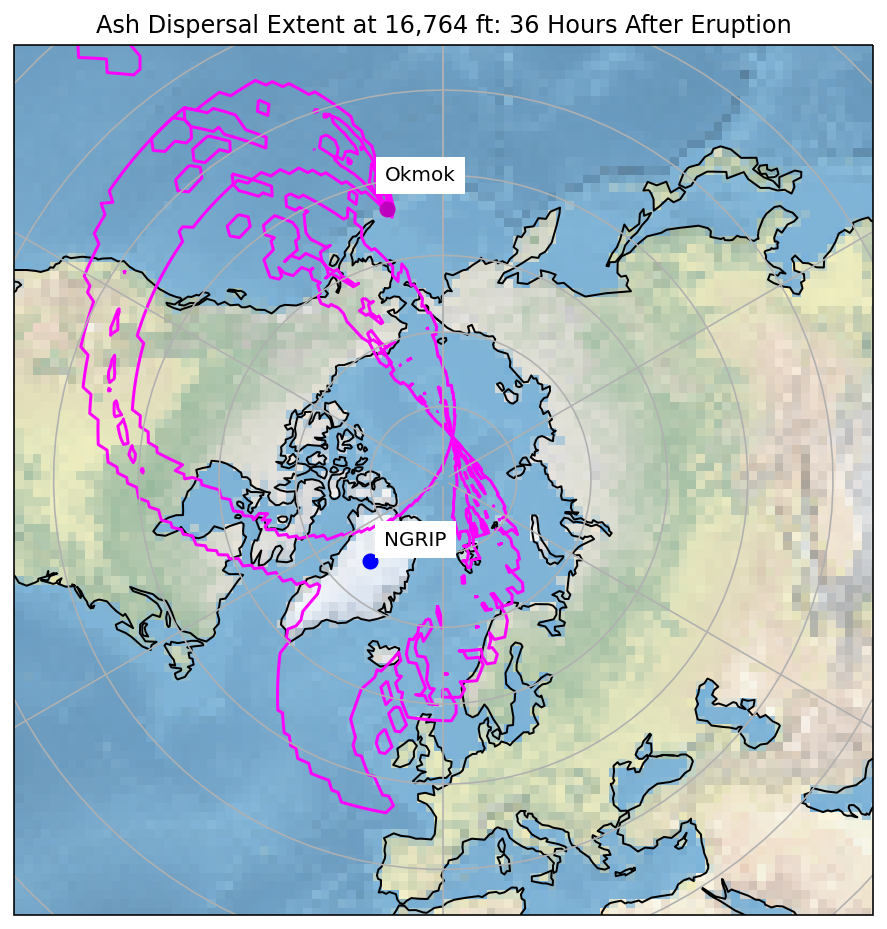

In [27]:
# 36 hours, 16,764 ft
con = dsadd.sel(time ='2020-12-10T17:00:00.000000000', z = 16764)
extent = [-180, 180, 35, 90]
fig = plt.figure()
ax = plt.axes(projection=ccrs.NorthPolarStereo())

ax.coastlines()
ax.stock_img()
ax.gridlines()
ax.set_extent(extent, ccrs.PlateCarree())
con.plot.contour(ax=ax, transform = ccrs.RotatedPole(pole_longitude=168.0, 
                                                     pole_latitude=84.0, 
                                                     central_rotated_longitude=-146), cmap = 'magenta')
ax.set_title('Ash Dispersal Extent at 16,764 ft: 36 Hours After Eruption')
ax.plot(-168.1750, 53.4681, 'mo', markersize=7, transform=ccrs.Geodetic())
ax.plot(-42.32, 75.1, 'bo', markersize=7, transform=ccrs.Geodetic())
ax.text(-42, 78, 'NGRIP', transform=ccrs.Geodetic(), backgroundcolor = 'white')
ax.text(-169, 50, 'Okmok', transform=ccrs.Geodetic(), backgroundcolor = 'white');

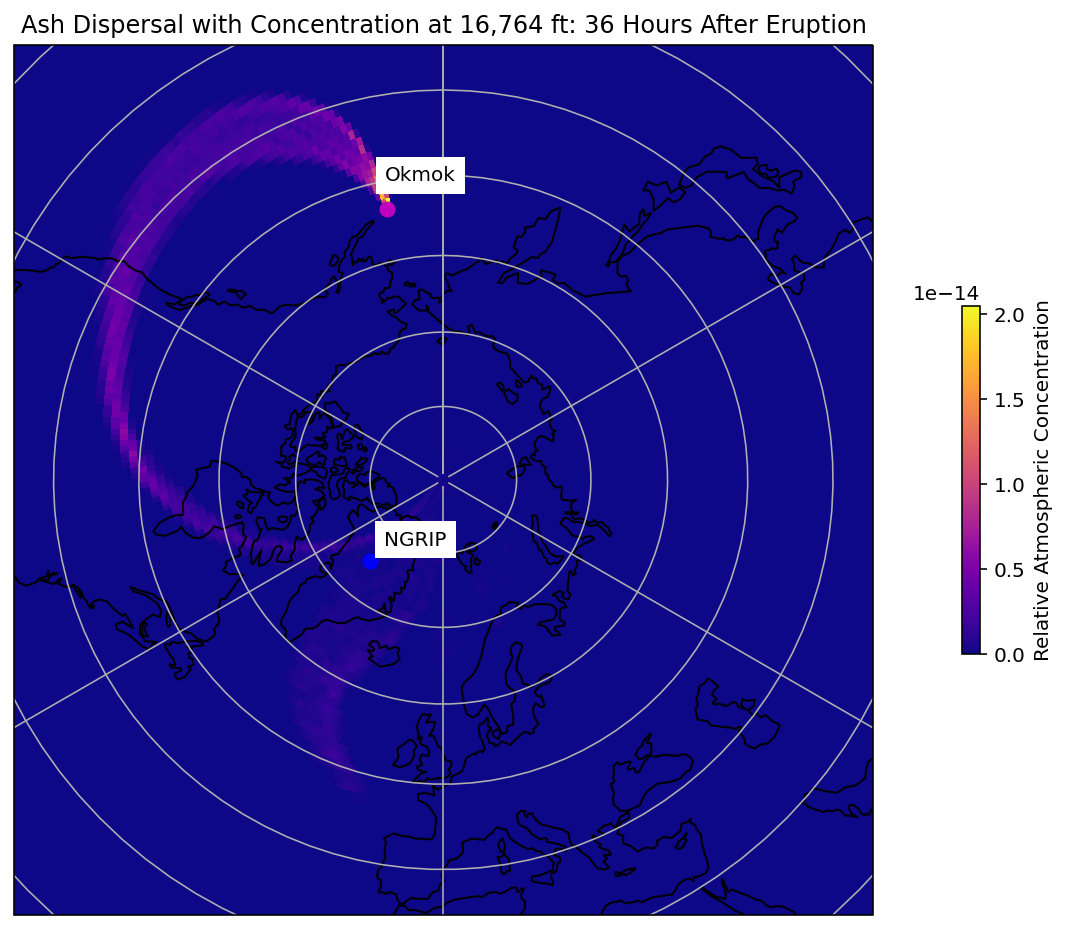

In [45]:
#select time and height of dispersal 36 hours, 16764 ft
con = dsadd.sel(time ='2020-12-10T17:00:00.000000000', z = 16764)

#plotting parameters // this one is a concentrtion heat map
extent = [-180, 180, 35, 90]
fig = plt.figure()
ax = plt.axes(projection=ccrs.NorthPolarStereo())

ax.coastlines()
ax.stock_img()
ax.gridlines()
ax.set_extent(extent, ccrs.PlateCarree())
con.plot(ax=ax, transform = ccrs.RotatedPole(pole_longitude=168.0, 
                                                     pole_latitude=84.0, 
                                                     central_rotated_longitude=-146), 
         cmap= 'plasma',
         cbar_kwargs={'shrink': 0.4, 'label': 'Relative Atmospheric Concentration'})

ax.set_title('Ash Dispersal with Concentration at 16,764 ft: 36 Hours After Eruption')
ax.plot(-168.1750, 53.4681, 'mo', markersize=7, transform=ccrs.Geodetic())
ax.plot(-42.32, 75.1, 'bo', markersize=7, transform=ccrs.Geodetic())
ax.text(-42, 78, 'NGRIP', transform=ccrs.Geodetic(), backgroundcolor = 'white')
ax.text(-169, 50, 'Okmok', transform=ccrs.Geodetic(), backgroundcolor = 'white');


Overall, I'm extremely happy with how the results turned out! I wasn't sure I would be able to use any HYSPLIT model output in xarray, let alone with a modeled eruption of Okmok II.

The modeled results suggest atmospheric dispersal over Greenland after just 36 hours. However, because the parameters are hypothesized and the calendar date of the eruption is unknown, I cannot conclusively say that the eruption magnitude and atmospheric circulation conditions would've allowed for ash dispersal and deposition across the Northern Hemisphere. 

## Works Cited

Initialized scripts and class variable creation from MONETIO module by the NOAA ARL. Contributors are: John A Stevenson, Declan Valters, Fabio Dioguardi, Barry Barker, Alice Crawford. 

Repositories can be found at: 

https://github.com/BritishGeologicalSurvey/ash-model-plotting  

https://github.com/noaa-oar-arl/monetio

Parameter estimations from:

Burgisser, Alain. “Physical Volcanology of the 2,050 Caldera-Forming Eruption of Okmok Volcano, Alaska.” Bulletin of Volcanology, vol. 67, no. 6, July 2005, pp. 497–525. ui.adsabs.harvard.edu, doi:10.1007/s00445-004-0391-5.

McConnell, Joseph R., et al. “Extreme Climate after Massive Eruption of Alaska’s Okmok Volcano in 43 BCE and Effects on the Late Roman Republic and Ptolemaic Kingdom.” Proceedings of the National Academy of Sciences, vol. 117, no. 27, July 2020, p. 15443, doi:10.1073/pnas.2002722117.
